# Real Estate Price Predictions
Using the <i>Ames Housing</i> dataset, this notebook will apply machine learning models to predict our target variable, 'SalePrice'.

## The Objective
This is a Regression problem, which we will attempt first with a simple Linear Regression model before moving on to more complex and computationally-expensive algorithms like Random Forests and Gradient Boosting. Each model will be scored based on residual error and model run time for comparison.


## Project Setup

### Modules used
This project will lean heavily on pandas, numpy, and seaborn for Exploratory Data Analysis ("EDA", hereafter) and the sklearn library for training, testing, and scoring our models. For variable descriptions, see <i>var_descriptions.md</i> file.


In [1]:
# import libraries
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Data
We will use the <i>AmesHousing</i> dataset available from [kaggle](https://www.kaggle.com/prevek18/ames-housing-dataset).

In [2]:
# import data
df = pd.read_csv('AmesHousing.csv')

In [3]:
df.shape

(2930, 82)

In [4]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [7]:
print(f"""
No. observations: {df.shape[0]}
No. features: {df.shape[1]}
No. numeric features: {df.select_dtypes(include=['number']).shape[1]}
No. non-numeric features: {df.select_dtypes(include=['object']).shape[1]}
No. missing values: {df.isna().values.sum()}
""")


No. observations: 2930
No. features: 82
No. numeric features: 39
No. non-numeric features: 43
No. missing values: 13997



## EDA - Target Variable
We will start by examining our target variable, 'SalePrice'.

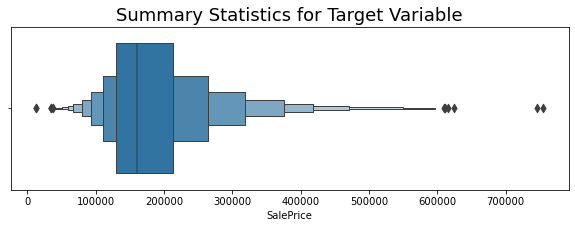


Target Variable Statistics:
count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64



In [8]:
plt.figure(figsize=(10,3))
sns.boxenplot(df['SalePrice'])
plt.title("Summary Statistics for Target Variable", fontsize=18)
plt.show()

print(f"""
Target Variable Statistics:
{df['SalePrice'].describe()}
""")

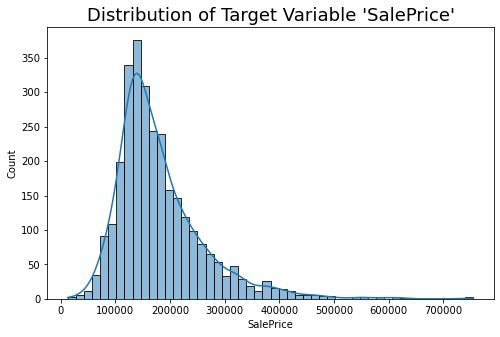

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(df['SalePrice'], bins=50, kde=True)
plt.title("Distribution of Target Variable 'SalePrice'", fontsize=18)
plt.show()

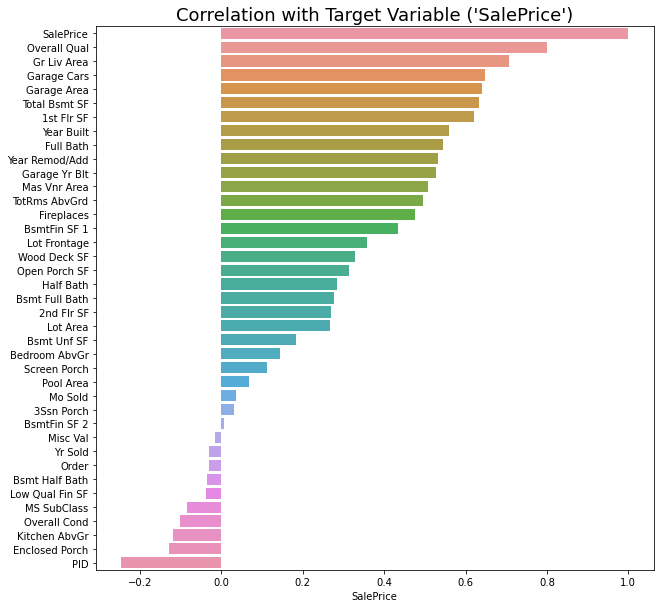

In [10]:
plt.figure(figsize=(10,10))
sale_price_corr = df.corr()['SalePrice'].sort_values(ascending=False)
sns.barplot(sale_price_corr, x='SalePrice', y=sale_price_corr.index)
plt.title("Correlation with Target Variable ('SalePrice')", fontsize=18)
plt.show()


### Target Variable Summary.
In our first round of EDA, we see that our target variable 'SalePrice' is in the range \$12,789 to \$755,000. The mean is $180,796 and we likely have outliers on both ends of the range. Our initial correlation plot shows we have over 20 variables that at least moderately correlated with the target variable.

However, many features are not yet represented in correlation plots due to data type. In part 2 of EDA, we will focus on selecting the best features for our model.

## EDA - Feature Selection
This section will focus on cleaning data and reducing final feature set for modelling. For some of our variables, we will need to perform data imputation and label encoding. Our goal is to reduce the number of features to those necessary for an accurate model.

Benefits of dimensionality reduction:
<ol>
	<li>Reduces training time.</li>
	<li>Reduces overfitting.</li>
	<li>Improves accuracy.</li>
</ol>



### Missing Values
First, we should address missing values in the dataset. It is safe to assume with real estate information that missing values are most likely due to features not present on the property. This means we can simply fill the missing data with zeroes.

In [12]:
print(f"""
There are {df.isna().values.sum()} missing values in this dataset!""")


There are 13997 missing values in this dataset!


In [13]:
df.fillna(0, inplace=True)

### Dealing with Categorical Variables
Now that we have dealt with our missing values, we can turn to categorical variables. We have a lot of data imputation and label encoding to get the dataset ready for modelling.

In [14]:
df.columns[df.dtypes=='object']

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')

#### Zoning.

In [15]:
df['MS Zoning'].unique()

array(['RL', 'RH', 'FV', 'RM', 'C (all)', 'I (all)', 'A (agr)'],
      dtype=object)

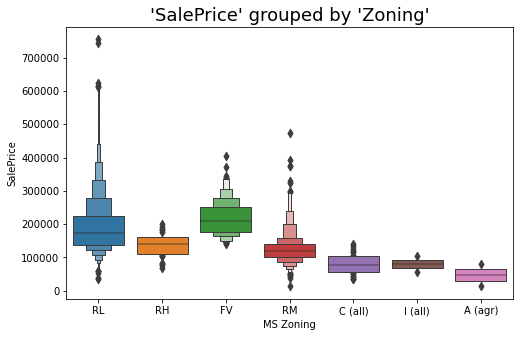

In [16]:
plt.figure(figsize=(8, 5))
sns.boxenplot(x=df['MS Zoning'], y=df['SalePrice'])
plt.title("'SalePrice' grouped by 'Zoning'", fontsize=18)
plt.show()

In [17]:
print('Sale Price by Zoning')
df.groupby('MS Zoning')['SalePrice'].mean().sort_values(ascending=False)

Sale Price by Zoning


MS Zoning
FV         218986.949640
RL         191283.251650
RH         136419.777778
RM         126781.393939
I (all)     80312.500000
C (all)     79795.040000
A (agr)     47300.000000
Name: SalePrice, dtype: float64

In [18]:
df['MS Zoning'] = df['MS Zoning'].replace(['FV', 'RL', 'RH', 'RM', 'I (all)', 'C (all)', 'A (agr)'], [10,9,8,7,6,5,4])

#### Utilities
Similarly, Utilities represents a scale of services present on the property. For this, we will replace "Electricity Only", "Electricity and Gas", "Electricity, Gas, and Water", and "All Public Utilities", with ordinals.

In [19]:
df.Utilities.value_counts()

AllPub    2927
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64

Nearly all variables have All Public utilities, rendering this variable superfluous. We will drop it.

In [20]:
df = df.drop(columns='Utilities')

#### Garage Quality.
The next interesting feature in the list is 'Garage Qual'.

In [21]:
print(f"""
Avg. SalePrice with Garage Qual: {df[df['Garage Qual'].isna()]['SalePrice'].mean()}
Avg. SalePrice without Garage Qual: {df[df['Garage Qual'].isna()==False]['SalePrice'].mean()}
""")


Avg. SalePrice with Garage Qual: nan
Avg. SalePrice without Garage Qual: 180796.0600682594



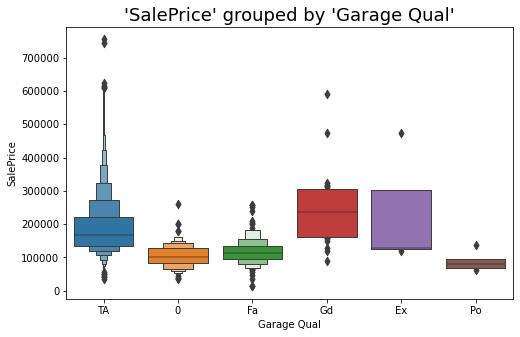

In [22]:
plt.figure(figsize=(8, 5))
sns.boxenplot(x=df['Garage Qual'], y=df['SalePrice'])
plt.title("'SalePrice' grouped by 'Garage Qual'", fontsize=18)
plt.show()


While we see a large increase in 'SalePrice' when 'Garage Qual' is listed for a property, we don't see a consistent increase in 'SalePrice' for increased scores for this variable.

This likely means that the presence of a garage on the property, or possibly <b>garage size</b>--not quality--is the more important metric. For that reason, I will keep only 'Garage Cars' and remove other garage columns.

In [23]:
df.columns[df.columns.str.contains('Garage')]
df.drop(columns={'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Area', 'Garage Qual', 'Garage Cond'}, inplace=True)

<b> Mas Vnr Type </b>

Next we can look into Mas Vnr Type.

In [24]:
df['Mas Vnr Type'].unique()

array(['Stone', 'None', 'BrkFace', 0, 'BrkCmn', 'CBlock'], dtype=object)

In [28]:
print(f"""
Avg. SalePrice with Mas Vnr Type: {df[df['Mas Vnr Type']==0]['SalePrice'].mean()}
Avg. SalePrice without Mas Vnr Type: {df[df['Mas Vnr Type']!=0]['SalePrice'].mean()}
""")


Avg. SalePrice with Mas Vnr Type: 233348.73913043478
Avg. SalePrice without Mas Vnr Type: 180380.26659786722



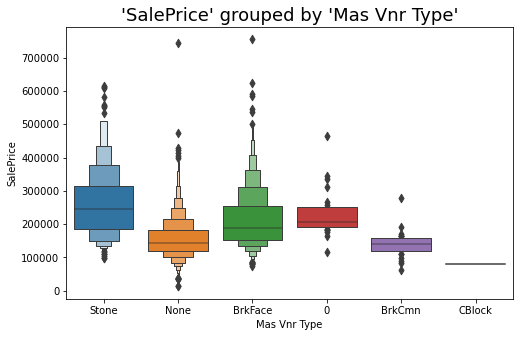

In [29]:
plt.figure(figsize=(8, 5))
sns.boxenplot(x=df['Mas Vnr Type'], y=df['SalePrice'])
plt.title("'SalePrice' grouped by 'Mas Vnr Type'", fontsize=18)
plt.show()


In [30]:
print("Mas Vnr Types")
df['Mas Vnr Type'].value_counts()

Mas Vnr Types


None       1752
BrkFace     880
Stone       249
BrkCmn       25
0            23
CBlock        1
Name: Mas Vnr Type, dtype: int64

In [31]:
df.groupby('Mas Vnr Type')['SalePrice'].mean()

Mas Vnr Type
0          233348.739130
BrkCmn     140199.000000
BrkFace    210798.592045
CBlock      80000.000000
None       154338.711187
Stone      260547.297189
Name: SalePrice, dtype: float64

In [19]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].replace(['CBlock', 'BrkCmn', 'None', 'BrkFace', 'Stone'], [2,4,6,8,10])
df['Mas Vnr Type'] = pd.Categorical(df['Mas Vnr Type'], ordered=True)

<b> Land Slope. </b>

Another factor that could weigh heavily on a purchase decision is the slope of the lot. This is another case where it makes sense to use ordinals rather than the abbreviated "Gentle", "Moderate", and "Severe".

In [26]:
df['Land Slope'].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

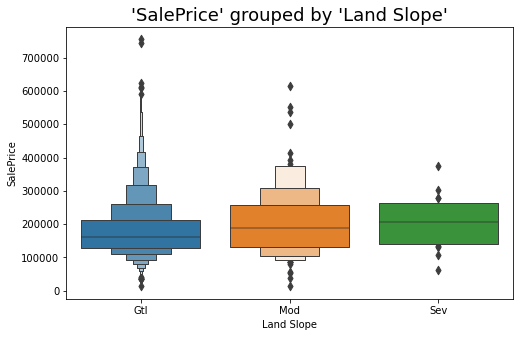

In [27]:
plt.figure(figsize=(8, 5))
sns.boxenplot(x=df['Land Slope'], y=df['SalePrice'])
plt.title("'SalePrice' grouped by 'Land Slope'", fontsize=18)
plt.show()

In [28]:
print('Sale Price by Land Slope')
df.groupby('Land Slope')['SalePrice'].describe()

Sale Price by Land Slope


,count,mean,std,min,25%,50%,75%,max
Land Slope,,,,,,,,
Gtl,2789.0,179565.365005,78487.303010,12789.0,129200.0,159950.0,212000.0,755000.0
Mod,125.0,204853.784000,103424.468431,13100.0,131000.0,188000.0,257076.0,615000.0
Sev,16.0,207370.625000,83062.243767,61000.0,141000.0,206975.0,264250.0,375000.0


Interestingly, it seems that a increased severity in slope <b>does not</b> negatively affect 'SalePrice'. From personal experience, I can say this data surprises me. I am more than willing to pay more for a lot with a gentle slope (or <i>"more usable area"</i>, in real estate developer terms). 

With this information, my first thought is that the topography of Ames, Iowa is such that any lot of considerable size may have a more sever slope. We can easily test this.

In [29]:
print('Lot Area by Land Slope')
df.groupby('Land Slope')['Lot Area'].describe()

Lot Area by Land Slope


,count,mean,std,min,25%,50%,75%,max
Land Slope,,,,,,,,
Gtl,2789.0,9741.875583,4706.790094,1300.0,7440.0,9360.0,11409.00,63887.0
Mod,125.0,12918.984000,10871.877579,2394.0,7200.0,10010.0,14100.00,70761.0
Sev,16.0,59277.937500,66037.356287,5400.0,18241.5,26896.5,71687.25,215245.0


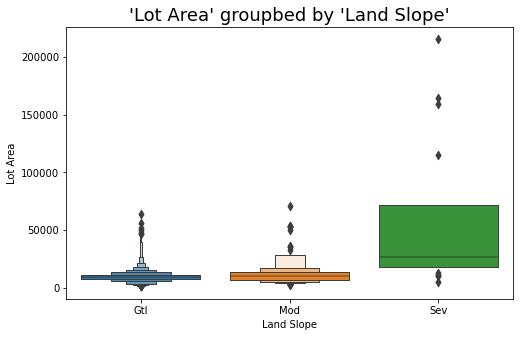

In [30]:
plt.figure(figsize=(8,5))
sns.boxenplot(data=df, x='Land Slope', y='Lot Area')
plt.title("'Lot Area' grouped by 'Land Slope'", fontsize=18)
plt.show()

Based on this data, I have to say that topography is a factor for 'Land Slope'. With the smallest property listed with severe 'Land Slope' at nearly <i>five times the size</i> of the smallest with gentle slope, and nearly as large a variance for the largest property in each respective class, I am sure our model will perform better without 'Land Slope'. We should remove it.

<b>Utilities</b>

Similarly, Utilities represents a scale of services present on the property. For this, we will replace "Electricity Only", "Electricity and Gas", "Electricity, Gas, and Water", and "All Public Utilities", with ordinals.

In [31]:
df['Utilities'] = df['Utilities'].replace(['NoSeWa', 'NoSewr', 'AllPub'], [3, 6, 9])

<b> Quality and Condition features.</b>

We have several features for various quality and conditions. A subset of these are numeric and return 1-10 scale, while others include only abbreviations for grades such as "Good" or "Excellent". 

These features include labels such as "Quality" or "Condition", so I will pull all columns with "Cond" or "Qu". We should encode these to ordinals and convert all categorical variables to the 'category' dtype.

In [32]:
encode_qual = df.columns[
    (df.dtypes=='object') &
    ((df.columns.str.contains('Qu')) |
    (df.columns.str.contains('Cond')))].to_list()

Let's see what's inside.

In [33]:
{col: [df[encode_qual][col].unique()] for col in df[encode_qual]}

{'Condition 1': [array(['Norm', 'Feedr', 'PosN', 'RRNe', 'RRAe', 'Artery', 'PosA', 'RRAn',
         'RRNn'], dtype=object)],
 'Condition 2': [array(['Norm', 'Feedr', 'PosA', 'PosN', 'Artery', 'RRNn', 'RRAe', 'RRAn'],
        dtype=object)],
 'Exter Qual': [array(['TA', 'Gd', 'Ex', 'Fa'], dtype=object)],
 'Exter Cond': [array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)],
 'Bsmt Qual': [array(['TA', 'Gd', 'Ex', nan, 'Fa', 'Po'], dtype=object)],
 'Bsmt Cond': [array(['Gd', 'TA', nan, 'Po', 'Fa', 'Ex'], dtype=object)],
 'Kitchen Qual': [array(['TA', 'Gd', 'Ex', 'Fa', 'Po'], dtype=object)],
 'Fireplace Qu': [array(['Gd', nan, 'TA', 'Po', 'Ex', 'Fa'], dtype=object)],
 'Garage Qual': [array(['TA', nan, 'Fa', 'Gd', 'Ex', 'Po'], dtype=object)],
 'Garage Cond': [array(['TA', nan, 'Fa', 'Gd', 'Ex', 'Po'], dtype=object)],
 'Sale Condition': [array(['Normal', 'Partial', 'Family', 'Abnorml', 'Alloca', 'AdjLand'],
        dtype=object)]}

We need to remove "Condition 1", "Condition 2", and "Sale Condition" from col_list since they are not qualitative scores.

In [34]:
encode_qual = encode_qual[2:9]
encode_qual

['Exter Qual',
 'Exter Cond',
 'Bsmt Qual',
 'Bsmt Cond',
 'Kitchen Qual',
 'Fireplace Qu',
 'Garage Qual']

Now that we have a list of features to update, I will create a new pandas dataframe containing the string values to replace alongside the new ordinal values taking their place. This will give us some added efficiencies in replacing this data across multiple columns.

In [35]:
df[encode_qual] = df[encode_qual].fillna(0)

In [36]:
cond = {"Str" : ['Ex', 'Gd', 'TA', 'Fa', 'Po'], 'Ord' : [10, 8, 6, 4, 2]}
grades = pd.DataFrame(data=cond)
grades

,Str,Ord
0,Ex,10
1,Gd,8
2,TA,6
3,Fa,4
4,Po,2


In [37]:
for i in range(0,5):
    df = df.replace([grades['Str'][i]], [grades['Ord'][i]])


In [38]:
df[encode_qual]

,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Kitchen Qual,Fireplace Qu,Garage Qual
0,6,6,6,8,6,8,6
1,6,6,6,6,6,0,6
2,6,6,6,6,8,0,6
3,8,6,6,6,10,6,6
4,6,6,8,6,6,6,6
...,...,...,...,...,...,...,...
2925,6,6,6,6,6,0,6
2926,6,6,8,6,6,0,6
2927,6,6,8,6,6,0,0
2928,6,6,8,6,6,6,6


<b>Dates.</b>

Two of the most import questions in real estate are "When?" and "Where?". To answer the question of when these transaction take place, we have columns for Month and Year ("Mo Sold", and "Yr Sold"); however, we would likely benefit from from a column that combines this data into a date. We are not given exact sale dates, so we can assign every sale to the first day of each month.  

In [42]:
df.rename(columns={
    'Mo Sold' : 'month',
    'Yr Sold' : 'year'
}, inplace=True)

df['sale_date'] = pd.to_datetime(df[['year', 'month']].assign(DAY=1))

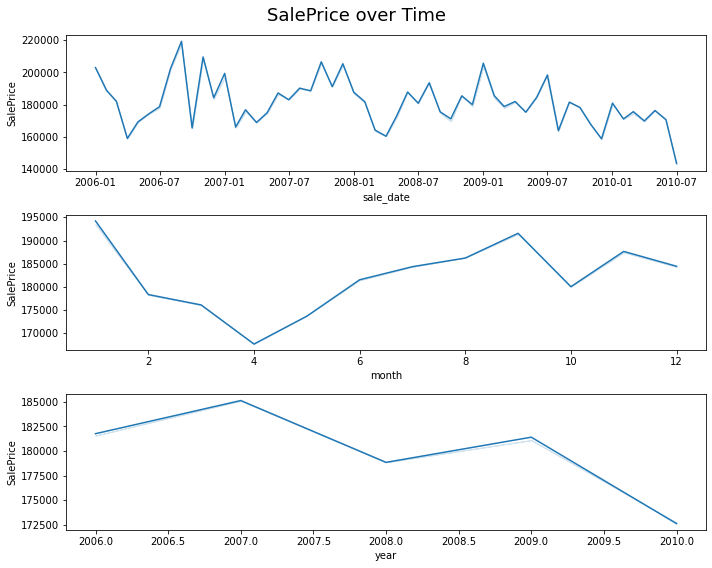

In [43]:
fig, ax = plt.subplots(nrows=3,ncols=1, figsize=(10, 8), tight_layout=True)

fig.suptitle("SalePrice over Time", fontsize=18)
sns.lineplot(data=df, x='sale_date', y='SalePrice', estimator=np.mean,ci=False, ax=ax[0])
sns.lineplot(data=df, x='year', y='SalePrice', estimator=np.mean,ci=False, ax=ax[2])
sns.lineplot(data=df, x='month', y='SalePrice', estimator=np.mean,ci=False, ax=ax[1])

fig.show()

In [49]:
df.columns[df.dtypes=='object']

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Foundation', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Central Air',
       'Electrical', 'Functional', 'Garage Type', 'Garage Finish',
       'Paved Drive', 'Misc Feature', 'Sale Type', 'Sale Condition'],
      dtype='object')

In [51]:
df['MS Zoning'].unique()

array(['RL', 'RH', 'FV', 'RM', 'C (all)', 'I (all)', 'A (agr)'],
      dtype=object)

<AxesSubplot:xlabel='MS Zoning'>

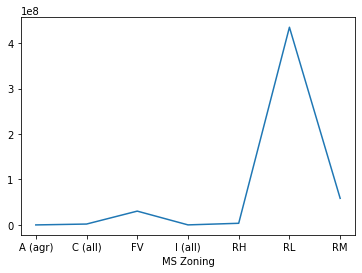

In [52]:
plt.figure(figsize=(8,5))
sns.boxenplot(data=df, x='Land Slope', y='Lot Area')
plt.title("'Lot Area' groupbed by 'Land Slope'", fontsize=18)
plt.show()

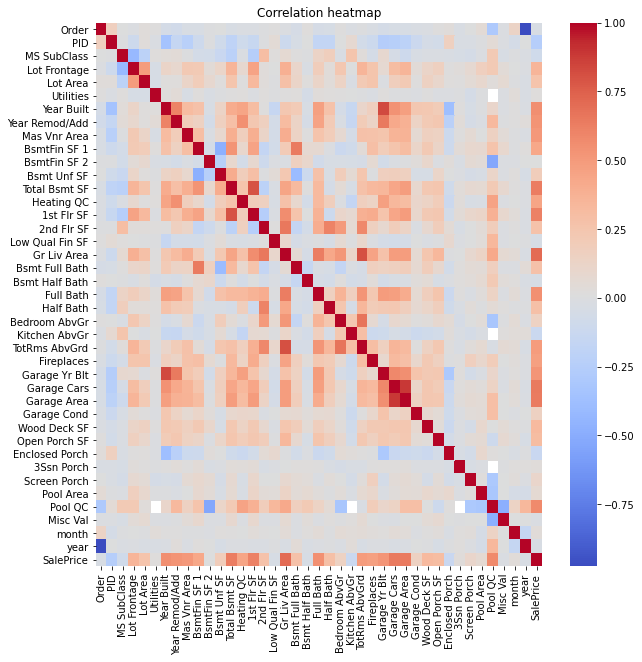

In [62]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

In [63]:
df.corr()['SalePrice']

Order             -0.031408
PID               -0.246521
MS SubClass       -0.085092
Lot Frontage       0.357318
Lot Area           0.266549
Utilities          0.026032
Year Built         0.558426
Year Remod/Add     0.532974
Mas Vnr Area       0.508285
BsmtFin SF 1       0.432914
BsmtFin SF 2       0.005891
Bsmt Unf SF        0.182855
Total Bsmt SF      0.632280
Heating QC         0.450325
1st Flr SF         0.621676
2nd Flr SF         0.269373
Low Qual Fin SF   -0.037660
Gr Liv Area        0.706780
Bsmt Full Bath     0.276050
Bsmt Half Bath    -0.035835
Full Bath          0.545604
Half Bath          0.285056
Bedroom AbvGr      0.143913
Kitchen AbvGr     -0.119814
TotRms AbvGrd      0.495474
Fireplaces         0.474558
Garage Yr Blt      0.526965
Garage Cars        0.647812
Garage Area        0.640401
Garage Cond        0.154402
Wood Deck SF       0.327143
Open Porch SF      0.312951
Enclosed Porch    -0.128787
3Ssn Porch         0.032225
Screen Porch       0.112151
Pool Area          0

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order            2930 non-null   int64         
 1   PID              2930 non-null   int64         
 2   MS SubClass      2930 non-null   int64         
 3   MS Zoning        2930 non-null   object        
 4   Lot Frontage     2440 non-null   float64       
 5   Lot Area         2930 non-null   int64         
 6   Street           2930 non-null   object        
 7   Alley            198 non-null    object        
 8   Lot Shape        2930 non-null   object        
 9   Land Contour     2930 non-null   object        
 10  Utilities        2930 non-null   int64         
 11  Lot Config       2930 non-null   object        
 12  Land Slope       2930 non-null   object        
 13  Neighborhood     2930 non-null   object        
 14  Condition 1      2930 non-null   object 

In [54]:
df['MS SubClass'].unique()

array([ 20,  60, 120,  50,  85, 160,  80,  30,  90, 190,  45,  70,  75,
        40, 180, 150], dtype=int64)

## EDA - summary

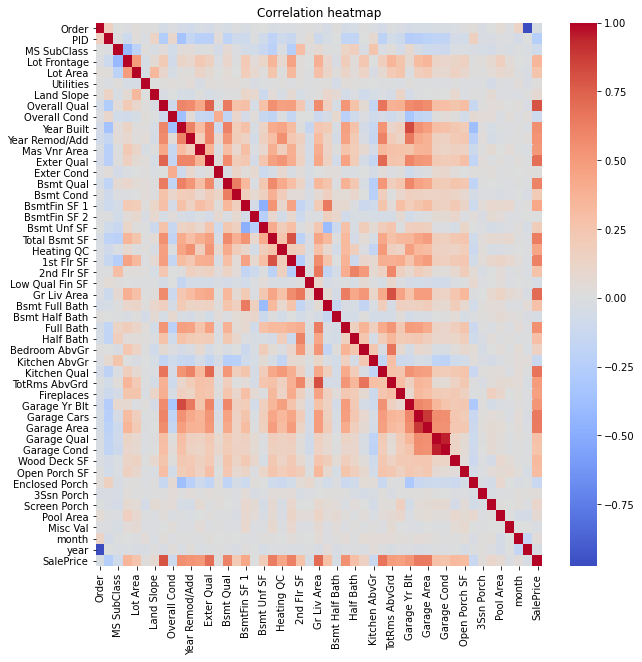

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

In [24]:
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Exter Qual         0.697970
Kitchen Qual       0.672914
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Bsmt Qual          0.607532
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
Heating QC         0.450325
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Garage Qual        0.277952
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Garage Cond        0.261805
Bsmt Cond          0.212074
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Land Slope         0.066396
month              0.035259
3Ssn Porch         0

### Final Features
There is a lot of interesting information buried in our features. After checking the correlations plot for our numerical features alongside the bar charts for each of our non-numerical features, I've narrowed our final list of features. I will add them to a list and then rename them--because who really knows what "Mas Vnr Type" really means?

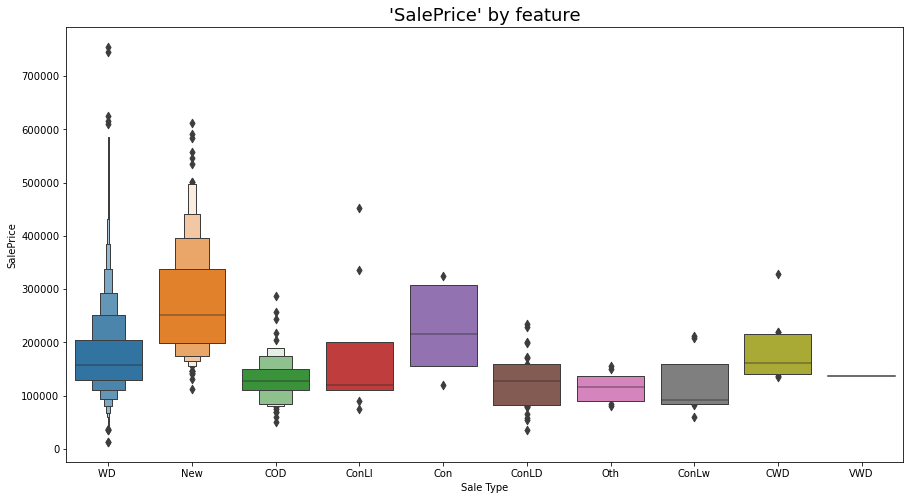

In [72]:
plt.figure(figsize=(15,8))
sns.boxenplot(data=df, x='Sale Type', y='SalePrice')
plt.title("'SalePrice' by feature", fontsize=18)
plt.show()

In [32]:
final_features = ['MS Zoning',
    'Overall Qual',
    'Gr Liv Area',
    'Exter Qual',
    'Garage Cars',
    'Total Bsmt SF',
    'Year Built',
    'Full Bath',
    'TotRms AbvGrd',
    'Fireplaces',
    'Wood Deck SF',
    'Open Porch SF',
    'Half Bath',
    'Lot Area',
    'Lot Config',
    'Neighborhood',
    'Bldg Type',
    'Exterior 1st',
    'Mas Vnr Type',
    'Foundation',
    'Heating',
    'Central Air',
    'Electrical',
    'Neighborhood',
    'Sale Type']

In [33]:
final_df = df[final_features]

In [34]:
final_df.columns

Index(['MS Zoning', 'Overall Qual', 'Gr Liv Area', 'Exter Qual', 'Garage Cars',
       'Total Bsmt SF', 'Year Built', 'Full Bath', 'TotRms AbvGrd',
       'Fireplaces', 'Wood Deck SF', 'Open Porch SF', 'Half Bath', 'Lot Area',
       'Land Contour', 'Lot Config', 'Neighborhood', 'Bldg Type',
       'Exterior 1st', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air',
       'Electrical', 'Neighborhood', 'Sale Type'],
      dtype='object')

In [35]:
final_df.rename(columns={
    'MS Zoning' : 'zoning_class',
    'Overall Qual' : 'quality',
    'Gr Liv Area' : 'sq_ft',
    'Exter Qual' : 'ext_qual',
    'Garage Cars' : 'garage_cars',
    'Total Bsmt SF' : 'basement_sq_ft',
    'Year Built' : 'year',
    'Full Bath' : 'bath_full',
    'TotRms AbvGrd' : 'num_rooms',
    'Fireplaces' : 'fireplace',
    'Wood Deck SF' :'sq_ft_deck_wood',
    'Open Porch SF' : 'sq_ft_open_porch',
    'Half Bath' : 'bath_half',
    'Lot Area' : 'lot_size',
    'Land Contour' : 'land_contour',
    'Lot Config' : 'lot_config',
    'Neighborhood' : 'neighborhood',
    'Bldg Type' : 'type',
    'Exterior 1st' : 'ext_material',
    'Mas Vnr Type' : 'veneer_material',
    'Foundation' : 'foundation',
    'Heating' : 'heating',
    'Central Air' : 'central_air', 
    'Electrical' : 'electrical', 
    'Sale Type' : 'sale_type'
}, inplace=True)

In [36]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   zoning_class      2930 non-null   object 
 1   quality           2930 non-null   int64  
 2   sq_ft             2930 non-null   int64  
 3   ext_qual          2930 non-null   int32  
 4   garage_cars       2929 non-null   float64
 5   basement_sq_ft    2929 non-null   float64
 6   year              2930 non-null   int64  
 7   bath_full         2930 non-null   int64  
 8   num_rooms         2930 non-null   int64  
 9   fireplace         2930 non-null   int64  
 10  sq_ft_deck_wood   2930 non-null   int64  
 11  sq_ft_open_porch  2930 non-null   int64  
 12  bath_half         2930 non-null   int64  
 13  lot_size          2930 non-null   int64  
 14  land_contour      2930 non-null   object 
 15  lot_config        2930 non-null   object 
 16  neighborhood      2930 non-null   object 


One final step I like to take before movii

With that, it's on to the fun part... Modelling.

## Predictions
### Training and Testing data
First we need to split our data into a training set and a testing set.